__This is the accident severity capstone project__

In [6]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
print ("all downloaded now")

all downloaded now


In [7]:
df = pd.read_csv('accident_data.csv')
df.head()

C:\Users\Paul.Young\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,SEVCODE2,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,2,47.703140,1,1307,1307,3502005,Matched,Intersection,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,1,47.647172,2,52200,52200,2607959,Matched,Block,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,1,47.607871,3,26700,26700,1482393,Matched,Block,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,1,47.604803,4,1144,1144,3503937,Matched,Block,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,2,47.545739,5,17700,17700,1807429,Matched,Intersection,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [8]:
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001761FBDC248>]],
      dtype=object)

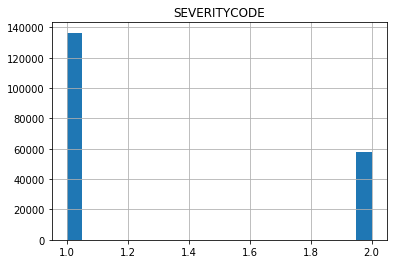

In [9]:
df.hist(column='SEVERITYCODE', bins=20)

In [11]:
#Clean_data 

In [11]:
df.drop(['X', 'Y'], axis=1)
df.head()

,SEVERITYCODE,X,SEVCODE2,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,2,47.703140,1,1307,1307,3502005,Matched,Intersection,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,1,47.647172,2,52200,52200,2607959,Matched,Block,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,1,47.607871,3,26700,26700,1482393,Matched,Block,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,1,47.604803,4,1144,1144,3503937,Matched,Block,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,2,47.545739,5,17700,17700,1807429,Matched,Intersection,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [12]:
dum = pd.get_dummies(df, columns=['SEVCODE2','ADDRTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING'])

In [13]:
dum.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,INTKEY,LOCATION,...,LIGHTCOND_Dark - No Street Lights,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other,LIGHTCOND_Unknown,SPEEDING_Y
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,37475.0,5TH AVE NE AND NE 103RD ST,...,0,0,0,0,0,1,0,0,0,0
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,...,0,0,1,0,0,0,0,0,0,0
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,...,0,0,0,0,0,1,0,0,0,0
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,...,0,0,0,0,0,1,0,0,0,0
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,...,0,0,0,0,0,1,0,0,0,0


In [15]:
dum.drop(['X', 'Y','OBJECTID', 'INCKEY','INTKEY', 'STATUS', 'REPORTNO','COLDETKEY'], axis=1)
dum.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,INTKEY,LOCATION,...,LIGHTCOND_Dark - No Street Lights,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other,LIGHTCOND_Unknown,SPEEDING_Y
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,37475.0,5TH AVE NE AND NE 103RD ST,...,0,0,0,0,0,1,0,0,0,0
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,...,0,0,1,0,0,0,0,0,0,0
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,...,0,0,0,0,0,1,0,0,0,0
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,...,0,0,0,0,0,1,0,0,0,0
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,...,0,0,0,0,0,1,0,0,0,0


In [34]:
dum.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC',
       'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT',
       'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE',
       'SDOT_COLCODE', 'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY',
       'CROSSWALKKEY', 'HITPARKEDCAR', 'SEVCODE2_1', 'SEVCODE2_2',
       'ADDRTYPE_Alley', 'ADDRTYPE_Block', 'ADDRTYPE_Intersection',
       'WEATHER_Blowing Sand/Dirt', 'WEATHER_Clear', 'WEATHER_Fog/Smog/Smoke',
       'WEATHER_Other', 'WEATHER_Overcast', 'WEATHER_Partly Cloudy',
       'WEATHER_Raining', 'WEATHER_Severe Crosswind',
       'WEATHER_Sleet/Hail/Freezing Rain', 'WEATHER_Snowing',
       'WEATHER_Unknown', 'ROADCOND_Dry', 'ROADCOND_Ice', 'ROADCOND_Oil',
       'ROADCOND_Other', 'ROADCOND_Sand/Mud/Dirt', 'ROADCOND_Snow/Slush',
       'ROA

In [39]:
P = dum.drop(['X', 'Y', 'PEDCOUNT','OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO','STATUS', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC'], axis=1)

In [40]:
P.corr()

,SEVERITYCODE,PERSONCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY,SEVCODE2_1,SEVCODE2_2,...,LIGHTCOND_Dark - No Street Lights,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other,LIGHTCOND_Unknown,SPEEDING_Y
SEVERITYCODE,1.000000,0.130949,0.214218,-0.054686,0.188905,0.004226,0.104276,0.175093,-1.000000,1.000000,...,-0.015901,-0.006079,-0.000618,0.001063,0.007586,0.087616,0.011773,-0.005895,-0.151296,0.038938
PERSONCOUNT,0.130949,1.000000,-0.038809,0.380523,-0.128960,0.011784,-0.021383,-0.032258,-0.130949,0.130949,...,-0.015269,-0.005750,0.017093,-0.003498,-0.019821,0.054236,0.010907,-0.008732,-0.081919,-0.002963
PEDCYLCOUNT,0.214218,-0.038809,1.000000,-0.253773,0.382521,0.034593,0.453657,0.109820,-0.214218,0.214218,...,-0.003688,-0.001977,-0.031864,0.002807,0.010615,0.051020,0.007773,-0.004128,-0.035000,-0.020391
VEHCOUNT,-0.054686,0.380523,-0.253773,1.000000,-0.365814,-0.023813,-0.122941,-0.200526,0.054686,-0.054686,...,-0.004069,-0.000210,0.014354,-0.005554,-0.005116,0.126593,0.012940,-0.001496,0.026727,-0.025743
SDOT_COLCODE,0.188905,-0.128960,0.382521,-0.365814,1.000000,-0.041084,0.206835,0.189518,-0.188905,0.188905,...,0.020375,0.012317,0.102308,0.005418,0.026105,0.002540,0.003932,0.000755,-0.170880,0.144714
SDOTCOLNUM,0.004226,0.011784,0.034593,-0.023813,-0.041084,1.000000,0.066449,0.086228,-0.004226,0.004226,...,-0.006294,-0.001427,0.002865,NaN,-0.010097,-0.037218,-0.010170,-0.002704,0.072290,-0.009144
SEGLANEKEY,0.104276,-0.021383,0.453657,-0.122941,0.206835,0.066449,1.000000,-0.003422,-0.104276,0.104276,...,-0.002917,-0.002197,-0.013201,-0.000611,0.006578,0.020794,0.002968,-0.002652,-0.016949,-0.006744
CROSSWALKKEY,0.175093,-0.032258,0.109820,-0.200526,0.189518,0.086228,-0.003422,1.000000,-0.175093,0.175093,...,-0.007809,0.002229,0.016364,-0.001018,0.010653,0.001263,0.000731,-0.002508,-0.026761,-0.025499
SEVCODE2_1,-1.000000,-0.130949,-0.214218,0.054686,-0.188905,-0.004226,-0.104276,-0.175093,1.000000,-1.000000,...,0.015901,0.006079,0.000618,-0.001063,-0.007586,-0.087616,-0.011773,0.005895,0.151296,-0.038938
SEVCODE2_2,1.000000,0.130949,0.214218,-0.054686,0.188905,0.004226,0.104276,0.175093,-1.000000,1.000000,...,-0.015901,-0.006079,-0.000618,0.001063,0.007586,0.087616,0.011773,-0.005895,-0.151296,0.038938


In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
P.columns

Index(['SEVERITYCODE', 'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT',
       'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE',
       'SDOT_COLCODE', 'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY',
       'CROSSWALKKEY', 'HITPARKEDCAR', 'SEVCODE2_1', 'SEVCODE2_2',
       'ADDRTYPE_Alley', 'ADDRTYPE_Block', 'ADDRTYPE_Intersection',
       'WEATHER_Blowing Sand/Dirt', 'WEATHER_Clear', 'WEATHER_Fog/Smog/Smoke',
       'WEATHER_Other', 'WEATHER_Overcast', 'WEATHER_Partly Cloudy',
       'WEATHER_Raining', 'WEATHER_Severe Crosswind',
       'WEATHER_Sleet/Hail/Freezing Rain', 'WEATHER_Snowing',
       'WEATHER_Unknown', 'ROADCOND_Dry', 'ROADCOND_Ice', 'ROADCOND_Oil',
       'ROADCOND_Other', 'ROADCOND_Sand/Mud/Dirt', 'ROADCOND_Snow/Slush',
       'ROADCOND_Standing Water', 'ROADCOND_Unknown', 'ROADCOND_Wet',
       'LIGHTCOND_Dark - No Street Lights',
       'LIGHTCOND_Dark - Street Lights Off',
 

In [57]:
X= P[['ADDRTYPE_Block', 'ADDRTYPE_Intersection', 'PERSONCOUNT', 'PEDCYLCOUNT','VEHCOUNT','SDOT_COLCODE','SPEEDING_Y', 'LIGHTCOND_Daylight', 'WEATHER_Fog/Smog/Smoke','LIGHTCOND_Dark - No Street Lights','WEATHER_Raining','ROADCOND_Ice','ROADCOND_Wet', 'ROADCOND_Oil', 'WEATHER_Severe Crosswind','WEATHER_Snowing']].values
X[0:5]

array([[ 0,  1,  2,  0,  2, 11,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 1,  0,  2,  0,  2, 16,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0],
       [ 1,  0,  4,  0,  3, 14,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  3,  0,  3, 11,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  2,  0,  2, 11,  0,  1,  0,  0,  1,  0,  1,  0,  0,  0]],
      dtype=int64)

In [58]:
y = P["SEVERITYCODE"]
y[0:5]

0    2
1    1
2    1
3    1
4    2
Name: SEVERITYCODE, dtype: int64

In [59]:
#Data Standardization

In [60]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-1.36876932,  1.41129279, -0.33020207, -0.16958841,  0.12553783,
        -0.41751024, -0.22440165,  0.82233559, -0.05414257, -0.08920831,
        -0.45298634, -0.07905204,  1.76085874, -0.01813462, -0.011333  ,
        -0.06841713],
       [ 0.73058329, -0.70857019, -0.33020207, -0.16958841,  0.12553783,
         0.31042563, -0.22440165, -1.21604855, -0.05414257, -0.08920831,
         2.2075721 , -0.07905204,  1.76085874, -0.01813462, -0.011333  ,
        -0.06841713],
       [ 0.73058329, -0.70857019,  1.15576451, -0.16958841,  1.7102107 ,
         0.01925128, -0.22440165,  0.82233559, -0.05414257, -0.08920831,
        -0.45298634, -0.07905204, -0.56790473, -0.01813462, -0.011333  ,
        -0.06841713],
       [ 0.73058329, -0.70857019,  0.41278122, -0.16958841,  1.7102107 ,
        -0.41751024, -0.22440165,  0.82233559, -0.05414257, -0.08920831,
        -0.45298634, -0.07905204, -0.56790473, -0.01813462, -0.011333  ,
        -0.06841713],
       [-1.36876932,  1.41129279, -0

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [76]:
accTree = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
accTree # it shows the default parameters

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [77]:
accTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [78]:
predTree = accTree.predict(X_testset)

In [79]:
print (predTree [0:5])
print (y_testset [0:5])

[1 1 1 2 1]
188393    1
191329    1
52824     1
42414     2
114021    1
Name: SEVERITYCODE, dtype: int64


In [80]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.7445635423444402


In [74]:
# Is there a better depth level? 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score

# Compare accuracy result for depth = 3, 4, 5 & 6
d_range = range(3, 7)
f1 = []
ja = []
for d in d_range:
    DT = DecisionTreeClassifier(criterion="entropy", max_depth=d)
    DT.fit(X_trainset, y_trainset)
    dt_yhat = DT.predict(X_testset)
    f1.append(f1_score(y_testset, dt_yhat, average='weighted'))
    ja.append(jaccard_similarity_score(y_testset, dt_yhat))

result = pd.DataFrame(f1, index=['d=3','d=4', 'd=5', 'd=6'])
result.columns = ['F1-score']
result.insert(loc=1, column='Jacard', value=ja)
result.columns.name = "Depth"
result

C:\Users\Paul.Young\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
C:\Users\Paul.Young\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
C:\Users\Paul.Young\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
C:\Users\Paul.Young\An

Depth,F1-score,Jacard
d=3,0.666725,0.732852
d=4,0.668412,0.740112
d=5,0.669675,0.740728
d=6,0.710536,0.744564


In [82]:
#Logistic Regression

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (155738, 16) (155738,)
Test set: (38935, 16) (38935,)


In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [86]:
yhat = LR.predict(X_test)
yhat

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [87]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.7362286 , 0.2637714 ],
       [0.62874143, 0.37125857],
       [0.82489526, 0.17510474],
       ...,
       [0.81598927, 0.18401073],
       [0.90022261, 0.09977739],
       [0.56984988, 0.43015012]])

In [88]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

C:\Users\Paul.Young\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.7354308462822653

In [105]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.543656935169157

In [117]:
# evaluate Logistic Reg
fs = round(f1_score(y_test, lr_yhat, average='weighted'),2 )

In [118]:
fs

0.68